Лабораторная работа 1 Поиск частых наборов

Выполнил: студент группы КЭ-403 В.С. Старишко

ЗАДАНИЕ

Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций


Наборы данных для лабораторной

retail - http://fimi.uantwerpen.be/data/retail.dat

kosarak - http://fimi.uantwerpen.be/data/kosarak.dat

Реализация алгоритма aprioiri - https://github.com/cmapman/Apriori

In [2]:
!wget http://fimi.uantwerpen.be/data/retail.dat

--2022-03-04 14:10:42--  http://fimi.uantwerpen.be/data/retail.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167490 (4.0M)
Saving to: ‘retail.dat’

retail.dat          100%[===================>]   3.97M  4.69MB/s    in 0.8s    

2022-03-04 14:10:43 (4.69 MB/s) - ‘retail.dat’ saved [4167490/4167490]



In [3]:
!wget http://fimi.uantwerpen.be/data/kosarak.dat

--2022-03-04 14:10:46--  http://fimi.uantwerpen.be/data/kosarak.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32029467 (31M)
Saving to: ‘kosarak.dat’

kosarak.dat         100%[===================>]  30.54M  17.2MB/s    in 1.8s    

2022-03-04 14:10:48 (17.2 MB/s) - ‘kosarak.dat’ saved [32029467/32029467]



In [4]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=6734f9ddf497e34da4b5834bb93f9baab0d6c65b28b9ecfceb49487413d7809e
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


Импорт библиотек

In [5]:
import numpy as np
from apyori import apriori
import pandas as pd
import seaborn as sns
import timeit



Считываем построчно данные из наборов

In [6]:
retailTransactions = [i.strip().split() for i in open("retail.dat").readlines()]

In [7]:
kosarakTransactions = [i.strip().split() for i in open("kosarak.dat").readlines()]

In [8]:
print(retailTransactions[0])
print(kosarakTransactions[0])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
['1', '2', '3']


Определим функцию для получения наборов с выводом правил, их поддержкой и уверенностью

In [9]:
def getSets(data:list, minSupport:int, sort:int=0, printFlag:int=0) -> list:
    num = 0
    rules = list(apriori(data, min_support=minSupport,min_lift=1.1))
    if sort:
      rules = sorted(rules, key=lambda a:a[1],  reverse=True)
    for item in rules:
      num+=1
      if printFlag:
          pair = item[0] 
          items = [x for x in pair]

          print(f"Rule:   {items}")

          print(f"Support:  {item[1]}")

          print(f"Confidence:  + {item[2][0][2]}")
          print(f"Lift:  + {item[2][0][3]}")
          print("----------------------------")
    return num

Протестируем функцию на наших наборах данных

In [23]:
retailTest = getSets(retailTransactions, 0.05, 1, 1)

Rule:   ['39', '48']
Support:  0.33055057734624893
Confidence:  + 0.5750764676862358
Lift:  + 1.2032726128908013
----------------------------
Rule:   ['39', '41']
Support:  0.12946620993171662
Confidence:  + 0.22523926985693143
Lift:  + 1.3287082307880087
----------------------------
Rule:   ['39', '38']
Support:  0.1173408044282117
Confidence:  + 0.663311105411644
Lift:  + 1.15399770449534
----------------------------
Rule:   ['41', '48']
Support:  0.10228896803611533
Confidence:  + 0.6034125125460019
Lift:  + 1.2625620963825945
----------------------------
Rule:   ['48', '32']
Support:  0.0911276967400921
Confidence:  + 0.5297026438979363
Lift:  + 1.1083337959257116
----------------------------
Rule:   ['39', '41', '48']
Support:  0.0835507361448243
Confidence:  + 0.14535767143561915
Lift:  + 1.4210493489806006
----------------------------
Rule:   ['39', '48', '38']
Support:  0.06921349334180259
Confidence:  + 0.3912541677353167
Lift:  + 1.1836438794825679
---------------------------

In [11]:
kosarakTest = getSets(kosarakTransactions, 0.1, 0, 1)

Rule:   ['6', '1']
Support:  0.1334472051571613
Confidence:  + 0.668852077236966
Lift:  + 1.1010866684771057
----------------------------
Rule:   ['6', '11']
Support:  0.3272851974036416
Confidence:  + 0.889986678203068
Lift:  + 1.4651258474666244
----------------------------
Rule:   ['6', '11', '3']
Support:  0.14513304013527245
Confidence:  + 0.3946602941782374
Lift:  + 1.4733934706879983
----------------------------


Выведем количество правил

In [12]:
print(retailTest)
print(kosarakTest)

8
3


Проведём эксперименты по зависимости количества наборов правил от значения минимальной поддержки

In [24]:
retailSets= []
kosarakSets = []

for minSupport in range(1, 30, 1):
  retailSets.append(getSets(retailTransactions, minSupport / 100, printFlag = 0))
  kosarakSets.append(getSets(kosarakTransactions, minSupport/ 100, printFlag = 0))

In [29]:
minSupportGraph = np.array([i for i in range(1, 30, 1)]) / 100
retailSetsData = pd.DataFrame({'min_support':minSupportGraph ,'number_sets':retailSets})
kosarakSetsData = pd.DataFrame({'min_support':minSupportGraph ,'number_sets':kosarakSets})

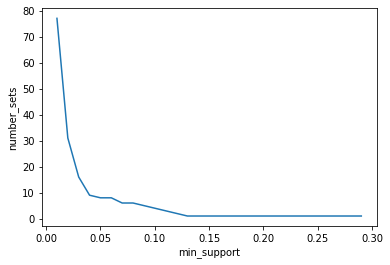

In [31]:
sns.lineplot(data=retailSetsData , x='min_support', y='number_sets')

График показывает зависимость времени выполнения от минимальной поддержки на наборе данных retail

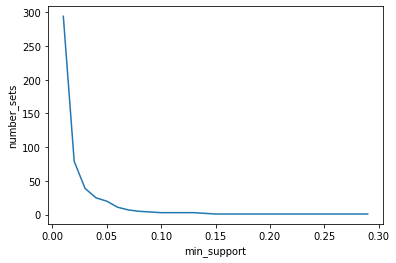

In [32]:
sns.lineplot(data=kosarakSetsData , x='min_support', y='number_sets')

График показывает зависимость времени выполнения от минимальной поддержки на наборе данных kosarak


Исходя из графиков можно сделать вывод, чем меньше минимальное значение поддержки, тем большее количество наборов можно получить


Посчитаем время выполнения функций для разных наборов данных и разных значений минимальной поддержки


In [33]:
def calcTime(name:str) -> list:
  time = []
  for minSupport in range(1, 30, 1):
    time.append(timeit.timeit(f'apriori({name}, min_support={minSupport / 100})', globals=
  globals()))
  return time

In [36]:
retailTime = calcTime('retailTransactions')
kosarakTime = calcTime('kosarakTransactions')

In [39]:
retailTimeData = pd.DataFrame({'min_support':minSupportGraph, 'time':retailTime})
kosarakTimeData = pd.DataFrame({'min_support':minSupportGraph, 'time':kosarakTime})


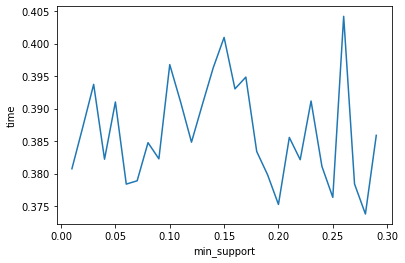

In [40]:
sns.lineplot(data=retailTimeData, x='min_support', y='time')

График показывает зависимость времени выполнения от минимальной поддержки на наборе данных retail


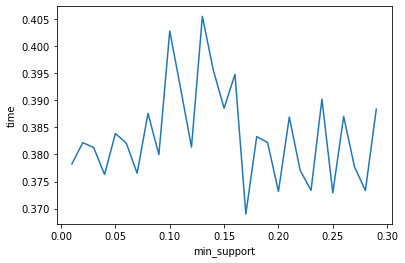

In [41]:
sns.lineplot(data=kosarakTimeData, x='min_support', y='time')

График показывает зависимость времени выполнения от минимальной поддержки на наборе данных kosarak

Как видно из графиков, минимальное значение поддержки не уменьшает времени работы алгоритма,  но размер набора данных влияет